In [1]:
import pandas as pd
df = pd.read_csv('../datas/matogrosso.csv')
df.dropna()

x = df[['ESCOLARIZACAO']]
y = df['IDHM']
df

,NOME_MUNICIPIO,CODIGO,GENTILICO,PREFEITO2017,AREA,POPESTIMADA,DENSIDADE,ESCOLARIZACAO,IDHM,MORTALIDADE,RECEITAS,DESPESAS,PIB
0,Acorizal,5100102,acorizano,CLODOALDO MONTEIRO DA SILVA,1014.029,5424,6.56,96.6,0.628,16.13,NaN,NaN,13362.95
1,Água Boa,5100201,água-boense,MAURO ROSA DA SILVA,7510.635,25229,2.79,99.2,0.729,10.23,92166.40674,81874.15633,37449.63
2,Alta Floresta,5100250,alta-florestense,ASIEL BEZERRA DE ARAUJO,8953.191,51615,5.48,98.0,0.714,19.19,146439.79095,118288.01810,31623.80
3,Alto Araguaia,5100300,araguaiano,GUSTAVO DE MELO ANICEZIO,5399.326,18703,2.84,96.7,0.704,9.09,63035.52537,55216.26966,50298.54
4,Alto Boa Vista,5100359,alto boa vistense,VALTUIR CANDIDO DA SILVA,2240.438,6659,2.34,96.8,0.651,37.04,23227.72780,20002.89582,16877.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Vila Rica,5108600,vila-riquense,ABMAEL BORGES DA SILVEIRA,7431.481,25570,2.88,94.3,0.688,13.94,65369.63512,53496.66729,18523.62
137,Nova Guarita,5108808,nova guaritense,JOSÉ LAIR ZAMONER,1114.126,4578,4.43,99.1,0.688,15.38,17948.12931,15845.81847,19328.36
138,Nova Marilândia,5108857,nova marilandense,JUVENAL ALEXANDRE DA SILVA,1936.428,3249,1.52,99.0,0.704,20.00,19867.45801,16245.31971,52652.90
139,Nova Maringá,5108907,nova maringaense,JOAO BRAGA NETO,11555.987,8428,0.57,95.9,0.663,12.05,30483.46311,26767.68830,50954.47


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)
X_train, X_test, y_train, y_test 

(     ESCOLARIZACAO
 113           98.4
 45            97.2
 23            97.9
 12            98.4
 136           94.3
 ..             ...
 66            98.6
 69            96.9
 120           96.4
 19            97.8
 42            96.6
 
 [98 rows x 1 columns],
      ESCOLARIZACAO
 125           96.5
 121           95.6
 41            99.2
 40            98.1
 43            98.3
 103           94.3
 49            95.4
 76            97.9
 17            97.2
 94            97.4
 6             95.4
 88            90.6
 80            97.6
 87            98.2
 24            98.1
 131           98.3
 128           96.6
 65            98.3
 129           98.8
 0             96.6
 108           96.6
 102           99.2
 96            98.5
 138           99.0
 115           98.8
 74            97.9
 33            96.1
 83            93.9
 30            90.4
 106           98.7
 90            94.3
 60            99.3
 37            95.8
 57            96.0
 104           95.9
 99           

In [3]:
from sklearn.linear_model import LinearRegression
regressao = LinearRegression()
regressao.fit(X_train,y_train)


LinearRegression()

In [4]:
print(regressao.intercept_,regressao.coef_)

0.18393135483062284 [0.00520584]


Text(0, 0.5, 'IDHM estimado')

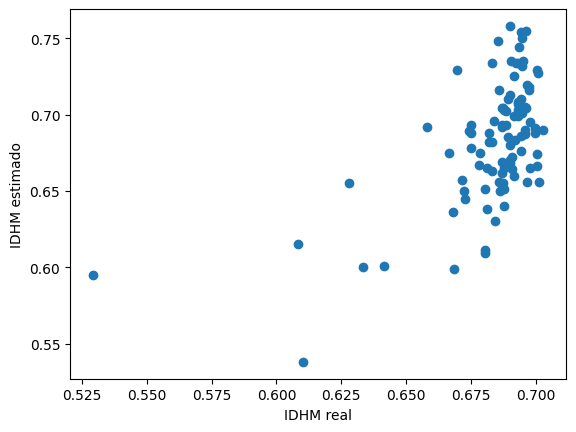

In [7]:
import matplotlib.pyplot as plt
predicao = regressao.predict(X_train)
plt.scatter(predicao,y_train)
plt.xlabel('IDHM real')
plt.ylabel('IDHM estimado')

In [ ]:
from sklearn import metrics
import numpy as np
print('r2:', metrics.r2_score(y_train, predicao))
print('MAE:', metrics.mean_absolute_error(y_train, predicao))
print('MSE:', metrics.mean_squared_error(y_train, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,predicao)))

r2: 0.33627001195642225
MAE: 0.026126268819102082
MSE: 0.0010379589791239627
RMSE: 0.032217370766776776
